# #PIMA Diabetes

# Introduction


<br><br>Untreated high blood sugar from diabetes can damage your nerves, eyes, kidneys, and other organs.<br><br>Blood Sugar level less than 140mg/dL is normal.<br>A reading of more than 200mg/dL after two hours indicates diabetes.<br>A reading between 140 and 199mg/dL indicates prediabetes.
</p>

# . Exploratory Data Analysis

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns', None)

In [12]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\modak\anaconda3\lib\site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [13]:
df = pd.read_csv("diabetes.csv")

In [14]:
df.shape

(768, 9)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [1]:
import seaborn as sns

In [ ]:
sns.pairplot(df)


   Age and Insulin columns are highly right skewed. I'll have to normalize it before using it for the model building,</li>
    <li>Dataset contains more number of people between the age of 20-40 years.</li>
    <li>Large number of people have blood pressure between 50 and 100 mmHg</li>
    <li>Large number of people with insulin values of 0. Mostly insulin levels of 0 are seen in Type 1 diabetic patients.</li>
    <li>Lot of people have glucose levels between 100 and 200 mg/dL. People with Glucose levels between 140mg/dL and 199mg/dL are considered to be prediabetic. </li>
    <li>There are a lot of people in the BMI range of 20 and 50. A healthy adult should have a BMI between 18.5 and 24.9. This dataset obviously has many people who are either overweight or obese.</li>
</ul>

Text(0.5, 0.98, 'Positive Correlation')

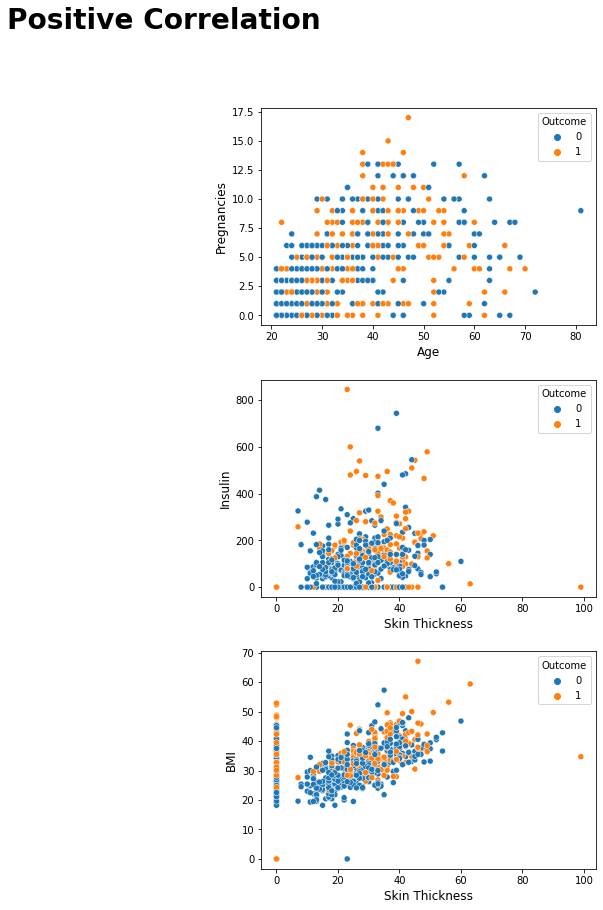

In [33]:
fig = plt.figure(figsize=(15,14))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.5, hspace=0.25)

axB = fig.add_subplot(gs[0,1])

axD = fig.add_subplot(gs[1,1])

axF = fig.add_subplot(gs[2,1])



axB.set_xlabel('Age',fontsize=12)
axB.set_ylabel('Pregnancies',fontsize=12)
sns.scatterplot(x="Age",y="Pregnancies",data=df, ax=axB, hue="Outcome")

axD.set_xlabel('Skin Thickness',fontsize=12)
axD.set_ylabel('Insulin',fontsize=12)
sns.scatterplot(x="SkinThickness",y="Insulin",data=df, ax=axD, hue="Outcome")


axF.set_xlabel('Skin Thickness',fontsize=12)
axF.set_ylabel('BMI',fontsize=12)
sns.scatterplot(x="SkinThickness",y="BMI",data=df, ax=axF, hue="Outcome")

fig.suptitle('Positive Correlation', fontsize="28", 
             weight="bold")




 Age vs Pregnancies shows minorly that with low number of pregnancy and lesser age the person tends to not have diabetes. But with increase in age and number of pregnancies chances of getting diabetes increases. </li>
    <li>Skin Thickness vs Insulin shows the larger skin thickness and higher insulin values contributes to Diabetes.</li>
    <li> there is high level of Insulin then why isn't Diabetes balanced thus probably body doesn't respond properly to the Insulin produced. So this leads to Diabetes and also increased Insulin Levels. 
    <li>Skin Thickness vs BMI shows higher BMI and larger skin thickness contributes to Diabetes. BMI greater than 25 is already defined as overweight and there are many people in this dataset with BMI greater than 30.</li>
</ul>

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

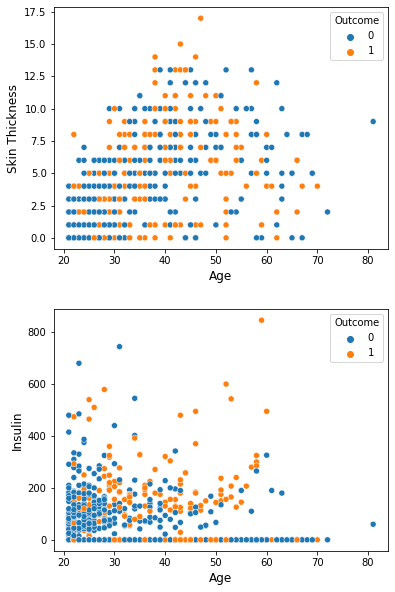

In [34]:
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.25)

axB = fig.add_subplot(gs[0,1])

axD = fig.add_subplot(gs[1,1])


axB.set_xlabel('Age',fontsize=12)
axB.set_ylabel('Skin Thickness',fontsize=12)
sns.scatterplot(x="Age",y="Pregnancies",data=df, ax=axB, hue="Outcome")


axD.set_xlabel('Age',fontsize=12)
axD.set_ylabel('Insulin',fontsize=12)
sns.scatterplot(x="Age",y="Insulin",data=df, ax=axD, hue="Outcome")





   Age vs Skin Thickness shows minorly that with lesser skin thickness and lesser age the person tends to not have diabetes. But with increase in age and increase in skin thickness chances of getting diabetes increases. </li>
    <li>Age vs Insulin shows the higher insulin levels and more aged people tend to have Diabetes.</li>
</ul>

# Data Preprocessing

## Missing Values

<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;"><li>After some digging I found that the zeroes in the columns like Insulin levels, BMI, Glucose etc. are just missing values.</li> <li>Also it was kind of obvious that glucose and other such important attributes of Human Body can never be zero.</li><li>So first I'll replace all the zeroes in such columns to NaN values and then impute accordingly with median.</li></ul>

In [35]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [36]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [37]:
def median_target(data, var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [38]:
def replace_median(data, columns):
    for i in columns:
        f = median_target(data, i)
        display(f)
        data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = f[[i]].values[0][0]
        data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = f[[i]].values[1][0]

In [39]:
null_cols = ['Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI']

In [40]:
replace_median(df, null_cols)

,Outcome,Glucose
0,0,107.0
1,1,140.0


,Outcome,BloodPressure
0,0,70.0
1,1,74.5


,Outcome,SkinThickness
0,0,27.0
1,1,32.0


,Outcome,Insulin
0,0,102.5
1,1,169.5


,Outcome,BMI
0,0,30.1
1,1,34.3


In [41]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Binning of Columns

In [43]:
df['Age'] = pd.qcut(df['Age'], 10, duplicates='drop')

In [44]:
df['BMI'] = pd.qcut(df['BMI'], 5, duplicates='drop')

Preparing data for Models

In [45]:
df = pd.get_dummies(df)

In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,"BMI_(18.198999999999998, 26.2]","BMI_(26.2, 30.1]","BMI_(30.1, 33.72]","BMI_(33.72, 37.8]","BMI_(37.8, 67.1]","Age_(20.999, 22.0]","Age_(22.0, 23.0]","Age_(23.0, 25.0]","Age_(25.0, 27.0]","Age_(27.0, 29.0]","Age_(29.0, 33.0]","Age_(33.0, 38.0]","Age_(38.0, 42.6]","Age_(42.6, 51.0]","Age_(51.0, 81.0]"
0,6,148.0,72.0,35.0,169.5,0.627,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,85.0,66.0,29.0,102.5,0.351,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,8,183.0,64.0,32.0,169.5,0.672,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,89.0,66.0,23.0,94.0,0.167,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,137.0,40.0,35.0,168.0,2.288,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [47]:
# Dividing data into Train and Test
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)
X_train,y_train = os.fit_resample(X_train, y_train.ravel())

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">I observed that there is more data that has Outcome 0. This may lead our models predicting more of people not having Diabetes. So I use SMOTE.
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.</p>

# Classification Models

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [52]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train, y_train)
prediction1 = logmodel.predict(X_test)

In [53]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction1))

Confusion Matrix:
 [[116  35]
 [ 18  62]]


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.81       151
           1       0.64      0.78      0.70        80

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.76       231
weighted avg       0.79      0.77      0.77       231



## K Nearest Neighbors

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [56]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[113  38]
 [ 27  53]]


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       151
           1       0.58      0.66      0.62        80

    accuracy                           0.72       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.72      0.72       231



In [59]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [60]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[116  35]
 [ 22  58]]


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       151
           1       0.62      0.72      0.67        80

    accuracy                           0.75       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.77      0.75      0.76       231



## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
prediction3 = rfc.predict(X_test)

In [63]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction3))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction3))

Confusion Matrix:
 [[127  24]
 [ 10  70]]


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       151
           1       0.74      0.88      0.80        80

    accuracy                           0.85       231
   macro avg       0.84      0.86      0.84       231
weighted avg       0.86      0.85      0.86       231



<h1 >Hyperparameter Tuning for Random Forest</h1>

In [64]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num=10)] 
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [65]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose=3, cv=10, n_jobs = 4)

In [68]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 209 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done 529 tasks      | elapsed:   21.2s
[Parallel(n_jobs=4)]: Done 977 tasks      | elapsed:   38.8s
[Parallel(n_jobs=4)]: Done 1553 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 2257 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 3089 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 3193 out of 3200 | elapsed:  2.0min remaining:    0.2s
[Parallel(n_jobs=4)]: Done 3200 out of 3200 | elapsed:  2.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              rand

In [69]:
grid_predictions = grid_search.predict(X_test)

In [70]:
print("Confusion Matrix: \n", confusion_matrix(y_test, grid_predictions))
print("\n")
print(classification_report(y_test, grid_predictions))

Confusion Matrix: 
 [[124  27]
 [  9  71]]


              precision    recall  f1-score   support

           0       0.93      0.82      0.87       151
           1       0.72      0.89      0.80        80

    accuracy                           0.84       231
   macro avg       0.83      0.85      0.84       231
weighted avg       0.86      0.84      0.85       231



Did not have much benefit from tuning the random forest.

<h1>Support Vector Machines</h1>

In [71]:
from sklearn.svm import SVC

In [72]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
predictions4 = svc_model.predict(X_test)

In [73]:
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions4))
print('\n')
print('Classification Report:\n', classification_report(y_test, predictions4))

Confusion Matrix:
 [[114  37]
 [ 19  61]]


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       151
           1       0.62      0.76      0.69        80

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.78      0.76      0.76       231



<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; ">Hyperparameter Tuning for SVM</h1>

In [74]:
param_grid_svm = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
from sklearn.model_selection import RandomizedSearchCV
rndm_cv = RandomizedSearchCV(estimator=svc_model, param_distributions=param_grid_svm, cv=10, verbose=2)
rndm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.1s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.1s
[CV] gamma=0.001, C=100 ..............................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ............................... gamma=0.001, C=100, total=   0.1s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.1s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.1s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.1s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.1s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.1s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.1s
[CV] gamma=1, C=1000 .................................................
[CV] 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.4s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [75]:
rndm_preds = rndm_cv.predict(X_test)

In [76]:
print('Confusion Matrix:\n', confusion_matrix(y_test, rndm_preds))
print('\n')
print('Classification Report:\n', classification_report(y_test, rndm_preds))

Confusion Matrix:
 [[118  33]
 [ 16  64]]


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       151
           1       0.66      0.80      0.72        80

    accuracy                           0.79       231
   macro avg       0.77      0.79      0.78       231
weighted avg       0.80      0.79      0.79       231



<h1 >XG Boost</h1>

In [77]:
from xgboost import XGBClassifier

In [78]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
xgb_preds = xgb.predict(X_test)

In [80]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb_preds)}")

Confusion Matrix :- 
[[138  13]
 [ 14  66]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.84      0.82      0.83        80

    accuracy                           0.88       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.88      0.88      0.88       231



<h1>Voting Classifier</h1>

In [81]:
from sklearn.ensemble import VotingClassifier

classifiers = [('XGboost', xgb), ('Random Forest', rfc), 
               ('Logistic', logmodel), ('KNN', knn), ('SVM', svc_model)]

In [82]:
vc = VotingClassifier(estimators = classifiers)

In [83]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('XGboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=5, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=180, n_jobs=0,
                                            num_para...
                                                   metric_params=None,
                                           

In [84]:
vc_preds = vc.predict(X_test)

In [85]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, vc_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, vc_preds)}")

Confusion Matrix :- 
[[124  27]
 [ 15  65]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.82      0.86       151
           1       0.71      0.81      0.76        80

    accuracy                           0.82       231
   macro avg       0.80      0.82      0.81       231
weighted avg       0.83      0.82      0.82       231



<a id="section5"></a>
<h1 >4. Results</h1>

In [86]:
print('The accuracy score of Logistic Regression Model is: ', accuracy_score(y_test, prediction1)*100,'%')
print('The accuracy score of K Nearest Neighbors Model is: ', accuracy_score(y_test, prediction2)*100,'%')
print('The accuracy score of Random Forests Model is: ', accuracy_score(y_test, prediction3)*100,'%')
print('The accuracy score of SVM Model is: ', accuracy_score(y_test, rndm_preds)*100,'%')
print('The accuracy score of XG Boost  is: ', accuracy_score(y_test, xgb_preds)*100,'%')
print('The accuracy score of Voting Classifer  is: ', accuracy_score(y_test, vc_preds)*100,'%')

The accuracy score of Logistic Regression Model is:  77.05627705627705 %
The accuracy score of K Nearest Neighbors Model is:  75.32467532467533 %
The accuracy score of Random Forests Model is:  85.28138528138528 %
The accuracy score of SVM Model is:  78.78787878787878 %
The accuracy score of XG Boost  is:  88.31168831168831 %
The accuracy score of Voting Classifer  is:  81.81818181818183 %


In [87]:
lr_acc = accuracy_score(y_test, prediction1)
knn_acc = accuracy_score(y_test, prediction2)
rfc_acc = accuracy_score(y_test, prediction3)
SVM_acc = accuracy_score(y_test, rndm_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)
vc_acc = accuracy_score(y_test, vc_preds)

In [88]:
model = ['Logistic Regression', 'K Nearest Neighbors', 'Random Forests', 'Support Vector Machines',
         'XGBoost', 'Voting Classifier']
score = [lr_acc, knn_acc, rfc_acc, SVM_acc, xgb_acc, vc_acc]

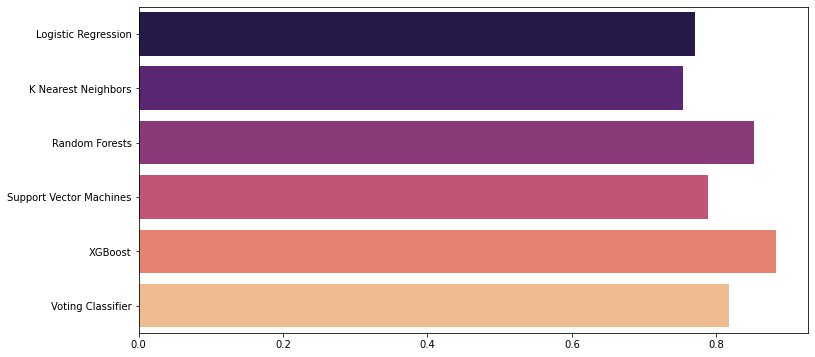

In [89]:
plt.figure(figsize = (12, 6))
sns.barplot(x = score, y = model, palette = 'magma')
plt.show()

<h3 >XG Boost performed the best with accuracy of 88.3%</h3>
<h3 >Random Forests is just behind with accuracy of 86.14%</h3>